In [18]:
import keras
import pandas as pd
import tensorflow as tf

import numpy as np
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Input,AveragePooling2D, BatchNormalization, LeakyReLU, SpatialDropout2D

# from keras.applications import MobileNet
# from keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

from collections import defaultdict,Counter
# from imblearn.over_sampling import SMOTE
from PIL import Image

# from kerastuner import HyperModel

In [9]:

def getSpeciesCode(x):
    part = x.split('_')
    if part[0] == 'ASETRI':
        return 0
    elif part[0] == 'EPTBOT':
        return 1
    elif part[0] == 'MYOEMA':
        return 2
    elif part[0] == 'PIPKUH':
        return 3
    elif part[0] == 'RHIMUS':
        return 4
    elif part[0] == 'RHYNAS':
        return 5
    elif part[0] == 'ROUAEG':
        return 6
    elif part[0] == 'TAPPER':
        return 7
    else:
        return 'Unknown'
    
def getSpecies(x):
    if x == 0:
        return 'A.tridens'
    elif x == 1:
        return 'E.bottae'
    elif x == 2:
        return 'M.emarginatus'
    elif x == 3:
        return 'P.kuhli'
    elif x == 4:
        return 'R.muscatellum'
    elif x == 5:
        return 'R.nasutus'
    elif x == 6:
        return 'R.aegyptius'
    elif x == 7:
        return 'T.perforatus'
    else:
        return 'Unknown'
    

def generate_actual_predicted(Y_pred, Y_test): 
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))
        
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))
        
    return actual, predicted


In [2]:
from keras.utils import np_utils
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix

n_split=10
n_classes=9
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
n_classes=8


In [7]:
import numpy as np
images=r'C:\\Users\\pinkb\\OneDrive\\Documents\\Spring 2020\\Deep Learning\\batsproject\\GitRepository\\ClassifyBatsAudio\\SpectogramInitial'
results_folder=r'C:\\Users\\pinkb\\OneDrive\\Documents\\Spring 2020\\Deep Learning\\batsproject\\GitRepository\\ClassifyBatsAudio\\TfLite+TensorRT\\TensorRT\\result\\'

actual=  np.load(results_folder+'y_actual_jetson.npy', allow_pickle= True)
predicted =np.load(results_folder+'y_pred_jetson.npy', allow_pickle= True)

np.unique(actual)


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [12]:
Y_actual_ohe=np_utils.to_categorical(actual ,num_classes=8);
Y_predicted_ohe=np_utils.to_categorical(predicted, num_classes=8);

In [13]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix

n_split=10
n_classes=8
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
n_classes=8
    
#generate predictions
# actual, predicted = generate_actual_predicted(output_data, Y_test)

#calc metrics
curr_base_prec, curr_base_rec, curr_f1, _ = precision_recall_fscore_support(actual, predicted)
curr_macro_prec = precision_score(actual, predicted,average='macro')
curr_macro_rec = recall_score(actual, predicted,average='macro')
curr_macro_f1 = f1_score(actual, predicted,average='macro')

actual_labeled = list()
predict_labeled = list()
for x,y in zip(actual,predicted):
    actual_labeled.append(getSpecies(x))
    predict_labeled.append(getSpecies(y))

labels = ['A.tridens','E.bottae','M.emarginatus','P.kuhli','R.muscatellum','R.nasutus', 'R.aegyptius', 'T.perforatus','No_Bat']
curr_cm=confusion_matrix(actual_labeled,predict_labeled,labels=labels)

curr_fpr = [0] * n_classes
curr_tpr = [0] * n_classes
for i in range(n_classes):
    curr_fpr[i], curr_tpr[i], _ = roc_curve(Y_actual_ohe[:,i], Y_predicted_ohe[:,i])

curr_prec = [0] * n_classes
curr_rec = [0] * n_classes
for i in range(n_classes):
    curr_prec[i], curr_rec[i], _ = precision_recall_curve(Y_actual_ohe[:,i], Y_predicted_ohe[:,i])


curr_accuracy = accuracy_score(actual, predicted)




In [14]:
print('precision by class', curr_base_prec)

print('macro precision',curr_macro_prec)

print('recall by class', curr_base_rec)

print('macro recall', curr_macro_rec)

print('f1 by class', curr_f1)

print('macro f1', curr_macro_f1)

print('accuracy', curr_accuracy)


precision by class [1.         1.         1.         0.99047619 0.6482275  0.97515528
 0.89285714 1.        ]
macro precision 0.9383395144697672
recall by class [0.8        0.10483871 0.09821429 0.34782609 0.9993994  0.58364312
 0.20661157 0.28039702]
macro recall 0.4276162746255808
f1 by class [0.88888889 0.18978102 0.17886179 0.51485149 0.78638941 0.73023256
 0.33557047 0.4379845 ]
macro f1 0.5078200153254977
accuracy 0.6981444665341285


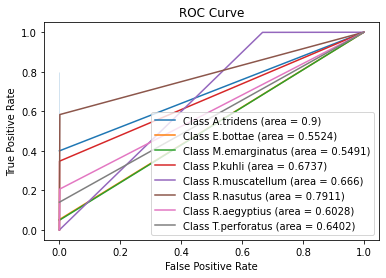

In [24]:
_, axs = plt.subplots(ncols=1)
axs.set(xlabel='False Positive Rate',ylabel='True Positive Rate', title='ROC Curve')
for j in range(n_classes):
    auc_val = auc(curr_fpr[j], curr_tpr[j])
    auc_val = np.around(auc_val,4)
    sns.lineplot(x=curr_fpr[j],y=curr_tpr[j],ax=axs, label='Class '+ getSpecies(j) +' (area = ' + str(auc_val) + ')', legend='brief')


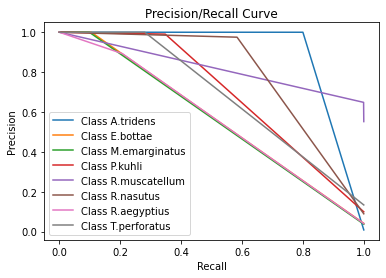

In [23]:
_, axs = plt.subplots(ncols=1)
axs.set(xlabel='Recall',ylabel='Precision', title='Precision/Recall Curve')
for j in range(n_classes):
    sns.lineplot(x=curr_rec[j],y=curr_prec[j],ax=axs, label='Class '+ getSpecies(j), legend='brief')

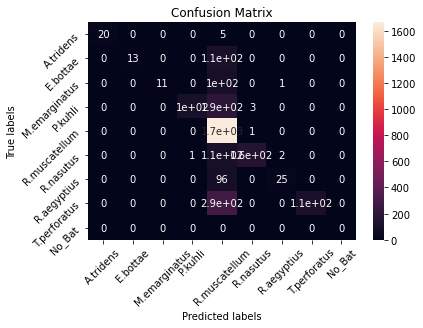

In [22]:
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

_, ax = plt.subplots(ncols=1)

sns.heatmap(curr_cm, annot=True); #annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);